In [118]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [121]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [122]:
df.dropna(inplace=True)

In [123]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [124]:
from sklearn.model_selection import train_test_split

x = df.drop(["median_house_value"], axis=1)
y= df["median_house_value"]

In [125]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33)

In [126]:
train = x_train.join(y_train)

In [127]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15539,-117.11,33.11,17.0,2641.0,627.0,1167.0,647.0,2.2875,<1H OCEAN,132400.0
18792,-122.57,40.61,27.0,1540.0,315.0,883.0,321.0,2.8036,INLAND,93400.0
4302,-118.29,34.09,52.0,1272.0,322.0,984.0,353.0,1.9063,<1H OCEAN,261600.0
3534,-118.55,34.26,21.0,4018.0,536.0,1508.0,529.0,8.2030,<1H OCEAN,445400.0
17274,-119.70,34.41,19.0,2086.0,575.0,1701.0,530.0,2.8042,NEAR OCEAN,236100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

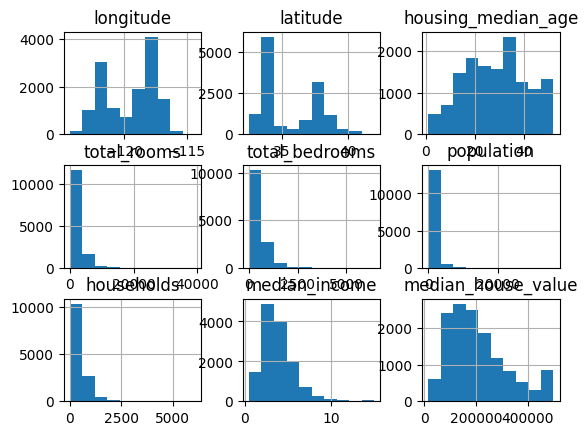

In [128]:
train.hist()

In [129]:
#  sns.heatmap(train.corr(), annot=True)
train.ocean_proximity.value_counts()


ocean_proximity
<1H OCEAN     6049
INLAND        4380
NEAR OCEAN    1735
NEAR BAY      1522
ISLAND           4
Name: count, dtype: int64

In [130]:
train = train.join(pd.get_dummies(train.ocean_proximity, dtype= int)).drop(['ocean_proximity'], axis=1)
 

<Axes: >

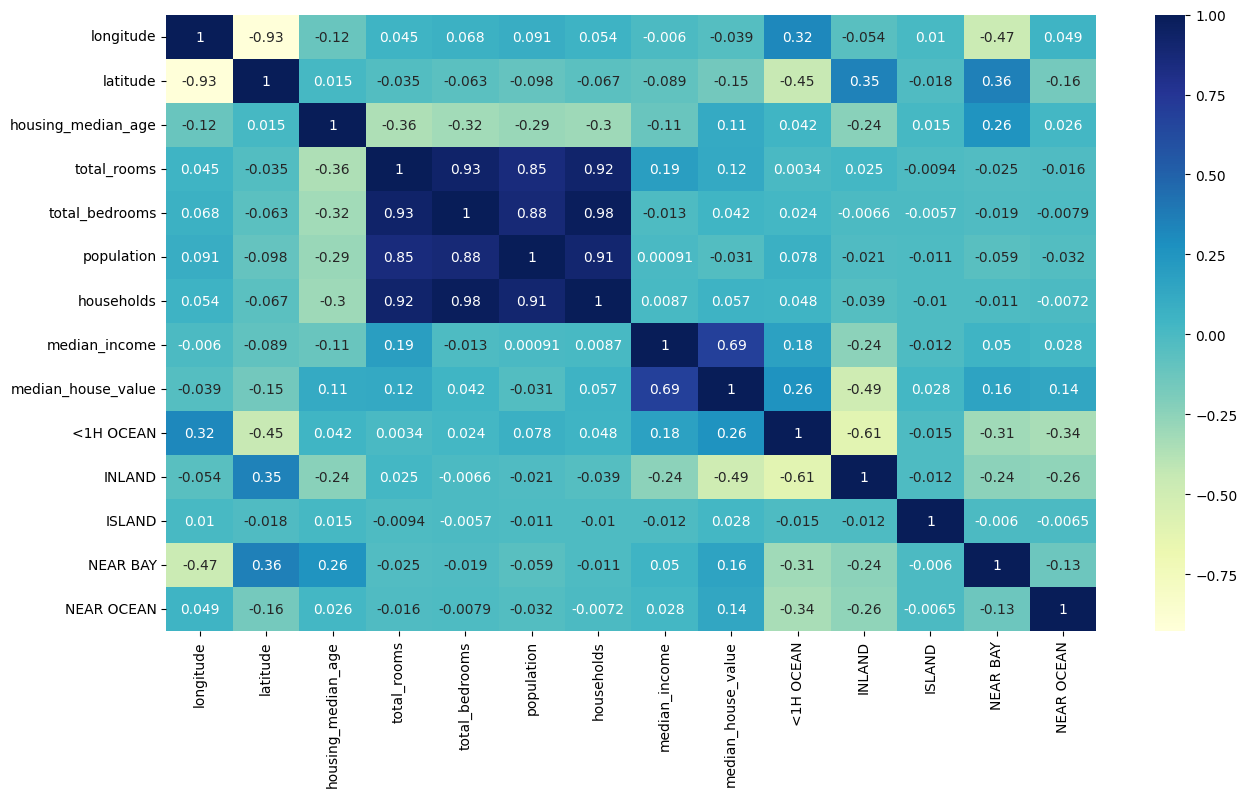

In [131]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(), annot= True, cmap="YlGnBu")


<Axes: xlabel='latitude', ylabel='longitude'>

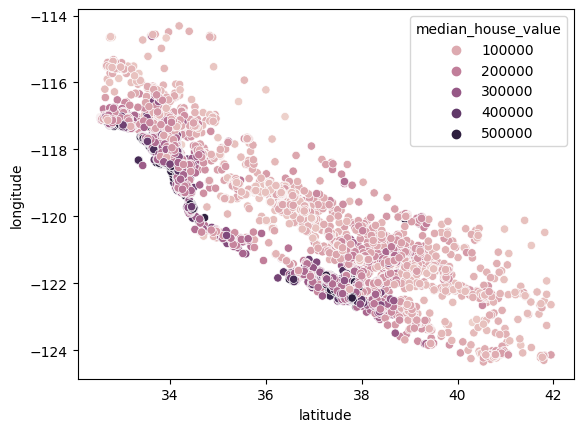

In [132]:
sns.scatterplot(x="latitude", y='longitude', data=train, hue = "median_house_value")

In [133]:
# train['bedroom_ratio'] = train['total_bedrooms']/train['total_rooms']
# train['household_rooms'] =train['total_rooms']/train['households']

<Axes: >

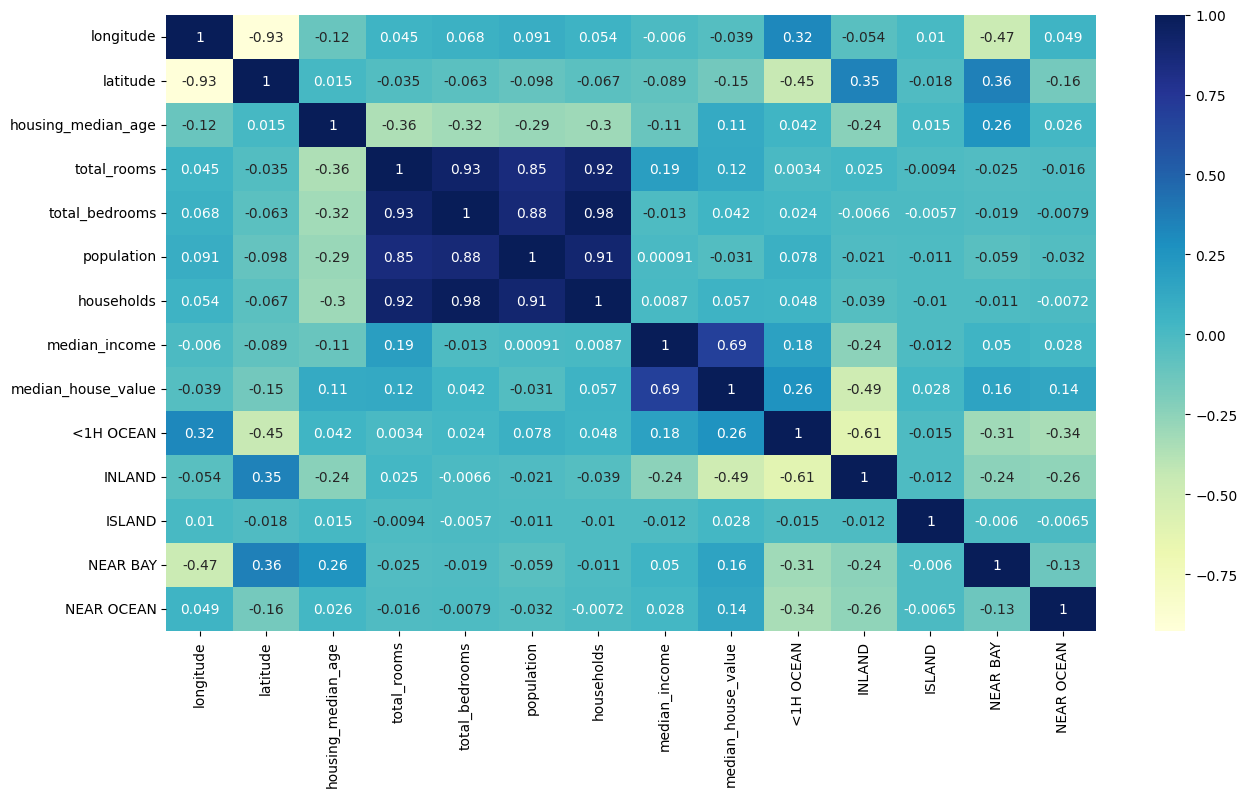

In [134]:
plt.figure(figsize=(15,8))

sns.heatmap(train.corr(), annot= True, cmap="YlGnBu")


In [135]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
x_train = train.drop(["median_house_value"], axis=1)
y_train = train['median_house_value']

reg.fit(x_train, y_train)

LinearRegression()

In [136]:
test = x_test.join(y_test)

test = test.join(pd.get_dummies(test.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)
x_test = test.drop(["median_house_value"], axis=1)
y_test = test['median_house_value']
# test['bedroom_ratio'] = test['total_bedrooms']/test['total_rooms']
# test['household_rooms'] =test['total_rooms']/test['households']

In [137]:
# # test = x_test.join(y_test)
# test['bedroom_ratio'] = test['total_bedrooms']/test['total_rooms']
# test['household_rooms'] =test['total_rooms']/test['households']
# # test = test.join(pd.get_dummies(test.ocean_proximity)).drop(['ocean_proximity'], axis=1)
# x_test = test.drop(["median_house_value"], axis=1)
# y_test = test['median_house_value']
test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17819,-121.90,37.39,42.0,42.0,14.0,26.0,14.0,1.7361,500001.0,1,0,0,0,0
7548,-118.20,33.92,39.0,1050.0,217.0,895.0,207.0,3.1538,155600.0,1,0,0,0,0
2374,-119.57,36.70,7.0,1761.0,309.0,974.0,308.0,3.7261,83900.0,0,1,0,0,0
11340,-117.93,33.75,24.0,1380.0,339.0,1472.0,304.0,4.2219,162800.0,1,0,0,0,0
19190,-122.68,38.44,29.0,2796.0,588.0,1346.0,562.0,2.9107,169700.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5232,-118.24,33.94,42.0,380.0,106.0,411.0,100.0,0.9705,90000.0,1,0,0,0,0
2843,-118.98,35.40,36.0,1864.0,331.0,1052.0,325.0,3.4205,76600.0,0,1,0,0,0
16021,-122.47,37.72,46.0,1836.0,319.0,767.0,302.0,5.9114,399000.0,0,0,0,0,1
20421,-118.83,34.17,17.0,4668.0,628.0,1917.0,624.0,8.1397,353900.0,1,0,0,0,0


In [138]:
train


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
15539,-117.11,33.11,17.0,2641.0,627.0,1167.0,647.0,2.2875,132400.0,1,0,0,0,0
18792,-122.57,40.61,27.0,1540.0,315.0,883.0,321.0,2.8036,93400.0,0,1,0,0,0
4302,-118.29,34.09,52.0,1272.0,322.0,984.0,353.0,1.9063,261600.0,1,0,0,0,0
3534,-118.55,34.26,21.0,4018.0,536.0,1508.0,529.0,8.2030,445400.0,1,0,0,0,0
17274,-119.70,34.41,19.0,2086.0,575.0,1701.0,530.0,2.8042,236100.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20198,-119.19,34.26,16.0,5018.0,853.0,2524.0,830.0,5.1752,218000.0,0,0,0,0,1
13741,-117.19,34.03,25.0,2513.0,340.0,900.0,320.0,6.4962,182400.0,0,1,0,0,0
10681,-117.76,33.53,18.0,3224.0,561.0,1310.0,580.0,8.4614,391900.0,1,0,0,0,0
3489,-118.45,34.28,38.0,1527.0,332.0,1303.0,340.0,3.5714,152000.0,1,0,0,0,0


In [139]:
reg.score(x_test,y_test)

0.6376541857096625

In [140]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, max_depth=25)

forest.fit(x_train, y_train)

RandomForestRegressor(max_depth=25, n_estimators=1000)

In [141]:
forest.score(x_test,y_test)

0.8177585444876279